# Trabajo Práctico Integrador
---

Josselyn Ordoñez - Tatiana Arenas - Jorge Valdez

# 1.- Dataset seleccionado.

*  Datos de distintas canciones en Spotify.

# 2.- Análisis exploratorio de datos (EDA)

* Visualizar las primeras filas. 
* Realizar un resumen de 5 números. 
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio). 
* Identificar las variables de entrada y de salida del problema. 
* Variables de entrada: 
    - Realizar los siguientes análisis por tipo de variable: 
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada 
categoría, etc. 
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 
* Variables de salida (en caso de aplicar): 
    - ¿Están balanceadas las clases? 
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Info:

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Cargamos librerías

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [40]:
DATASET_PATH = "data/"

In [41]:
# Cargamos el dataset
df = pd.read_csv(DATASET_PATH+'data_playlist.csv')

Visualizamos los primeros datos

In [42]:
# Visualizamos las primeras 5 filas
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


## Descripción del dataset
---

1. **acousticness**: Una medida que representa la cantidad de sonido acústico en una canción. Los valores varían de 0.0 a 1.0.

2. **danceability**: Una medida que describe cuánto se presta una canción para bailar, basada en varios factores musicales. Los valores varían de 0.0 a 1.0.

3. **duration**: La duración de la canción en milisegundos.

4. **energy**: Una medida que representa la intensidad y actividad de una canción. Los valores varían de 0.0 a 1.0.

5. **instrumentalness**: Como mencioné anteriormente, es una medida que predice si una pista es instrumental o no. Los valores varían de 0.0 a 1.0.

6. **key**: La clave tonal predominante de la canción, representada como un valor entero entre 0 y 11 (donde cada número corresponde a una clave musical).

7. **liveness**: Una medida que representa la presencia de una audiencia en la grabación de la canción. Los valores varían de 0.0 a 1.0.

8. **loudness**: El volumen general de la canción en decibelios (dB).

9. **mode**: Indica la modalidad de la canción (mayor o menor), representada como un valor binario (1 = Mayor, 0 = Menor).

10. **speechiness**: Una medida que representa la presencia de palabras habladas en una canción. Los valores varían de 0.0 a 1.0.

11. **tempo**: El tempo general de la canción en latidos por minuto (BPM).

12. **time_signature**: Una indicación general del número de beats en cada barra o compás de la canción.

13. **valence**: Una medida que representa la positividad transmitida por una canción. Los valores varían de 0.0 a 1.0.

14. **label**: indica si la canción le gusta o no a un usuario. 0 = no le gusta, 1 = si le gusta



In [43]:
# Mostramos la información del dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


Podemos ver que todas las columnas son leidas como tipo númerico. Luego veremos cuales son categóricas.

In [44]:
# Veo los valores únicos de la columna "key"
print("Valores únicos de columna 'key'",np.sort(df['key'].unique()))


Valores únicos de columna 'key' [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [45]:
# Veo los valores únicos de la columna "mode"
print("Valores únicos de columna 'mode'",np.sort(df['mode'].unique()))

Valores únicos de columna 'mode' [0 1]


In [46]:
# Veo los valores únicos de la columna "time_signature"
print("Valores únicos de columna 'time_signature'",np.sort(df['time_signature'].unique()))

Valores únicos de columna 'time_signature' [1 3 4 5]


Podemos argumentar que esta tres columnas son categoricas: 'key', 'mode' y 'time_signature'.

In [47]:
# Supuestos de variables independientes
NUMERICAL_FEATURES = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
CATEGORICAL_FEATURES = ['key', 'mode', 'time_signature']

# Variable objetivo
TARGET = 'label'

## Estadísticas descriptivas de variables númericas

In [48]:
# Mostramos un resumen estadístico de las columnas numéricas
df[NUMERICAL_FEATURES].describe() 

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,0.203376,-8.509339,0.098966,120.405761,0.497321
std,0.338405,0.172036,65587.690483,0.253301,0.259921,0.177609,5.039488,0.104715,28.378116,0.239615
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.024000,-29.601000,0.023400,55.747000,0.033200
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,0.094550,-10.173500,0.035900,98.998000,0.297000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,0.129000,-7.270000,0.048750,120.104500,0.483000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,0.264750,-5.097750,0.113000,138.074750,0.684500
max,0.994000,0.986000,675360.000000,0.995000,0.967000,0.979000,-0.533000,0.721000,204.162000,0.975000


## Estadísticas descriptivas de variables categóricas

In [49]:
# Mostramos un resumen estadístico de las columnas categóricas
df[CATEGORICAL_FEATURES].describe() 

,key,mode,time_signature
count,750.000000,750.000000,750.000000
mean,4.829333,0.741333,3.902667
std,3.636001,0.438194,0.400091
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,4.000000
50%,5.000000,1.000000,4.000000
75%,8.000000,1.000000,4.000000
max,11.000000,1.000000,5.000000


### Graficamos la dispersion de los datos de a pares

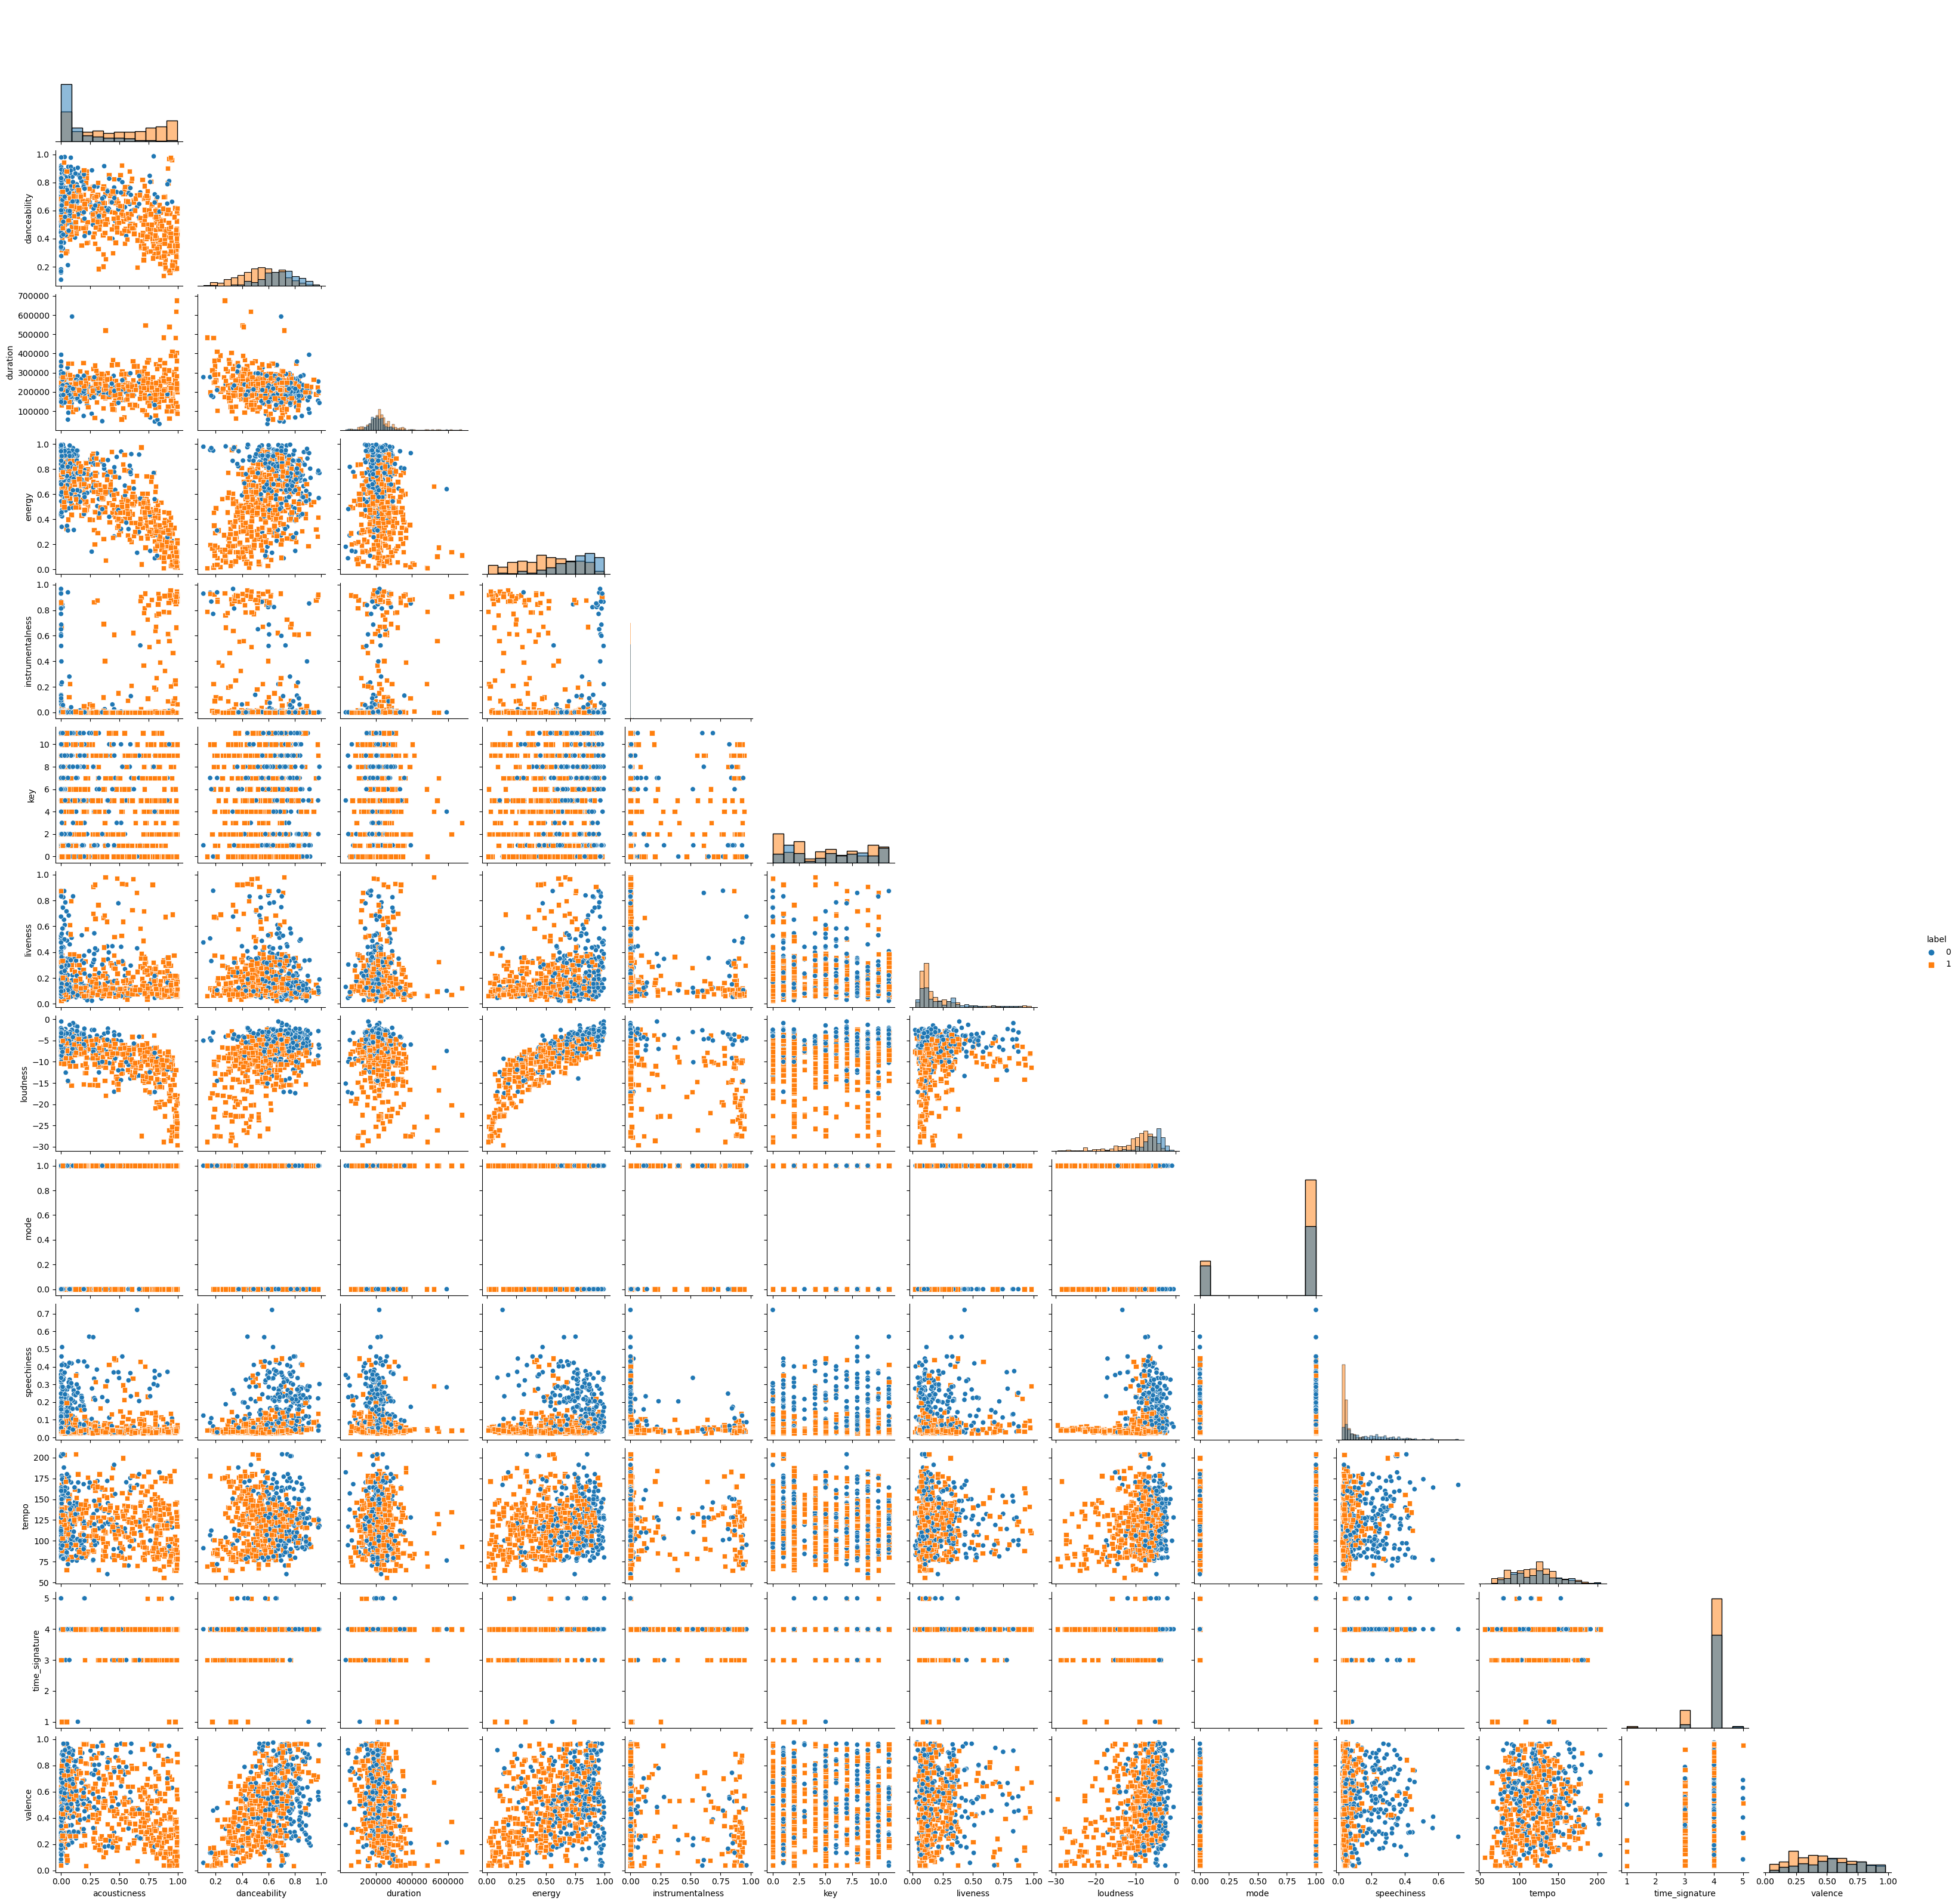

In [50]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"])

Analizamos como estan balanceadas las variables cetgoricas, en especial la variable objetivo 'label'

<AxesSubplot:xlabel='key', ylabel='count'>

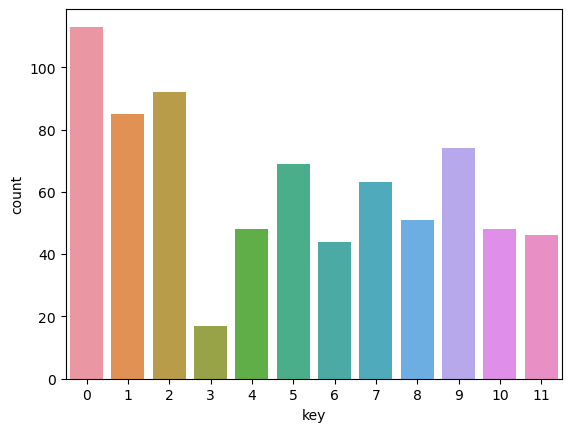

In [51]:
# Graficor la distribución de las variable key
sns.countplot(x="key", data=df)

<AxesSubplot:xlabel='mode', ylabel='count'>

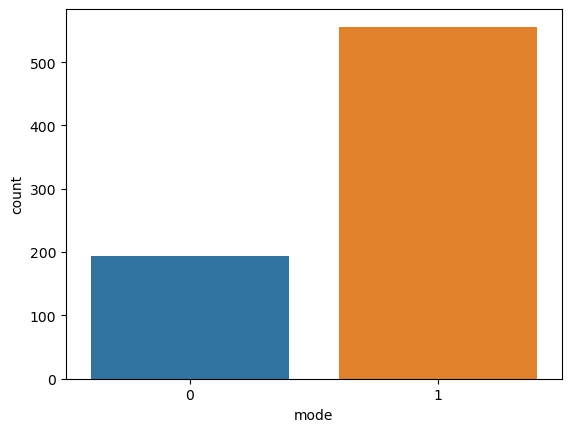

In [52]:
# Graficor la distribución de las variable mode
sns.countplot(x="mode", data=df)

<AxesSubplot:xlabel='label', ylabel='count'>

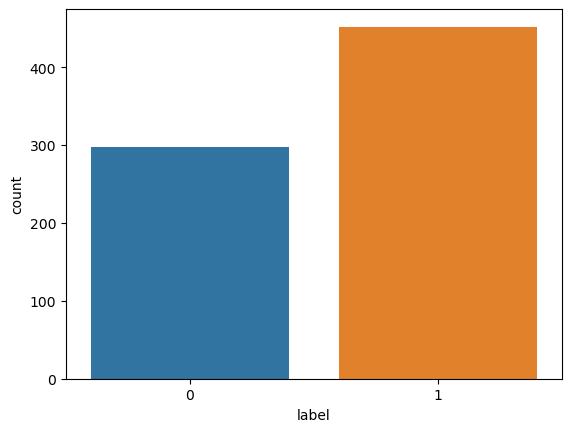

In [53]:
# Graficor la distribución de las variable label
sns.countplot(x="label", data=df)

# Sesgo y curtosis

Analizamos la distribución de las variables o carácteristicas de las canciones que hacen parte de la lista de reproducción que ha evaluado el usuario.

In [54]:
# Calculo la simetria de las variables
df_skew = df[NUMERICAL_FEATURES].skew()
df_skew

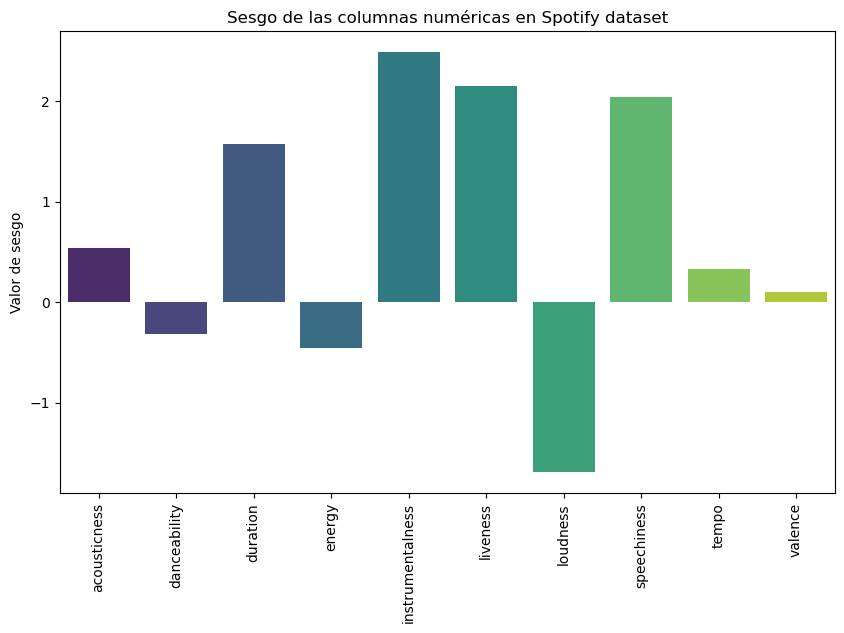

In [56]:
# Grafico la simetria de las variables

plt.figure(figsize=(10,6))
sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Sesgo de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de sesgo')

# Mostrar el gráfico
plt.show()

Los valores de sesgo-asimetría nos muestra lo siguiente del conjunto de datos:
* La distribución de las variables **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration** están altamente sesgadas. Es decir, que sus distribuciones no son normales y presenta una distribución desequilibrada. Los valores positivos nos indican que los datos tienen más peso a la derecha de la distribución y presenta colas hacia la derecha y al contrario con valores negativos. Si se quiere ver graficamente este hecho se puede observar la diagonal principal de la pairplot hecha anteriormente.

* Este tipo resultado se espera en la variable duration dado que la duración de una pista es un estandar en la insdustria músical. 

Más adelante con el cambio de estas a variables catégoricas será más evidente este sesgo. 

In [57]:
# Calculo la curtosis de las variables numéricas
df_kurtosis = df[NUMERICAL_FEATURES].kurtosis()
df_kurtosis

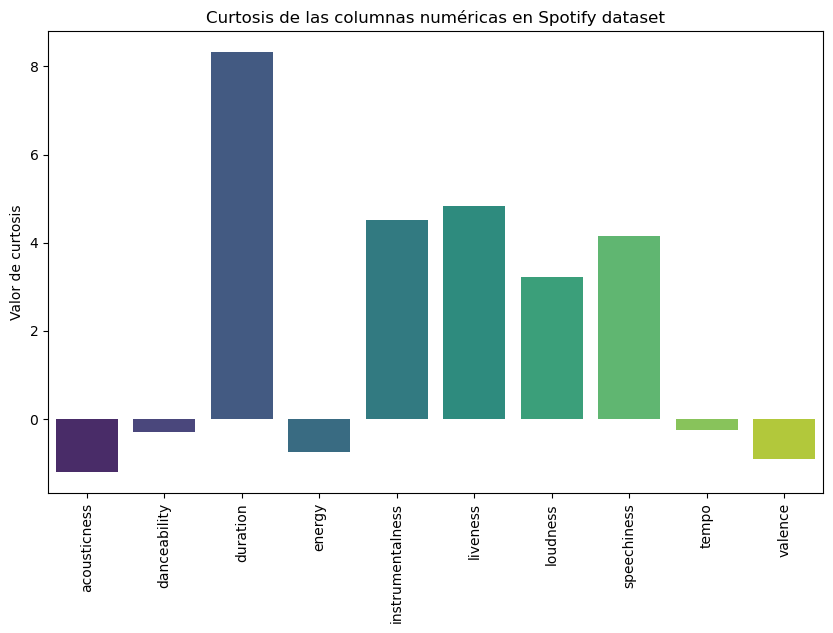

In [59]:
# Grafico kurtosis
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Curtosis de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de curtosis')

# Mostrar el gráfico
plt.show()

En este caso los datos leptocúrticos son **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration**. Lo que significa que tenemos distribuciones con grandes concentraciones de valores en un intervalo dado.

# Grafico de boxplot

Creamos los diagramas de cajas y bigotes para las variables numericas divididas según la variable objetivo que en este caso es 'label'. Con este podemos observar en general la distribución de dichas variables.

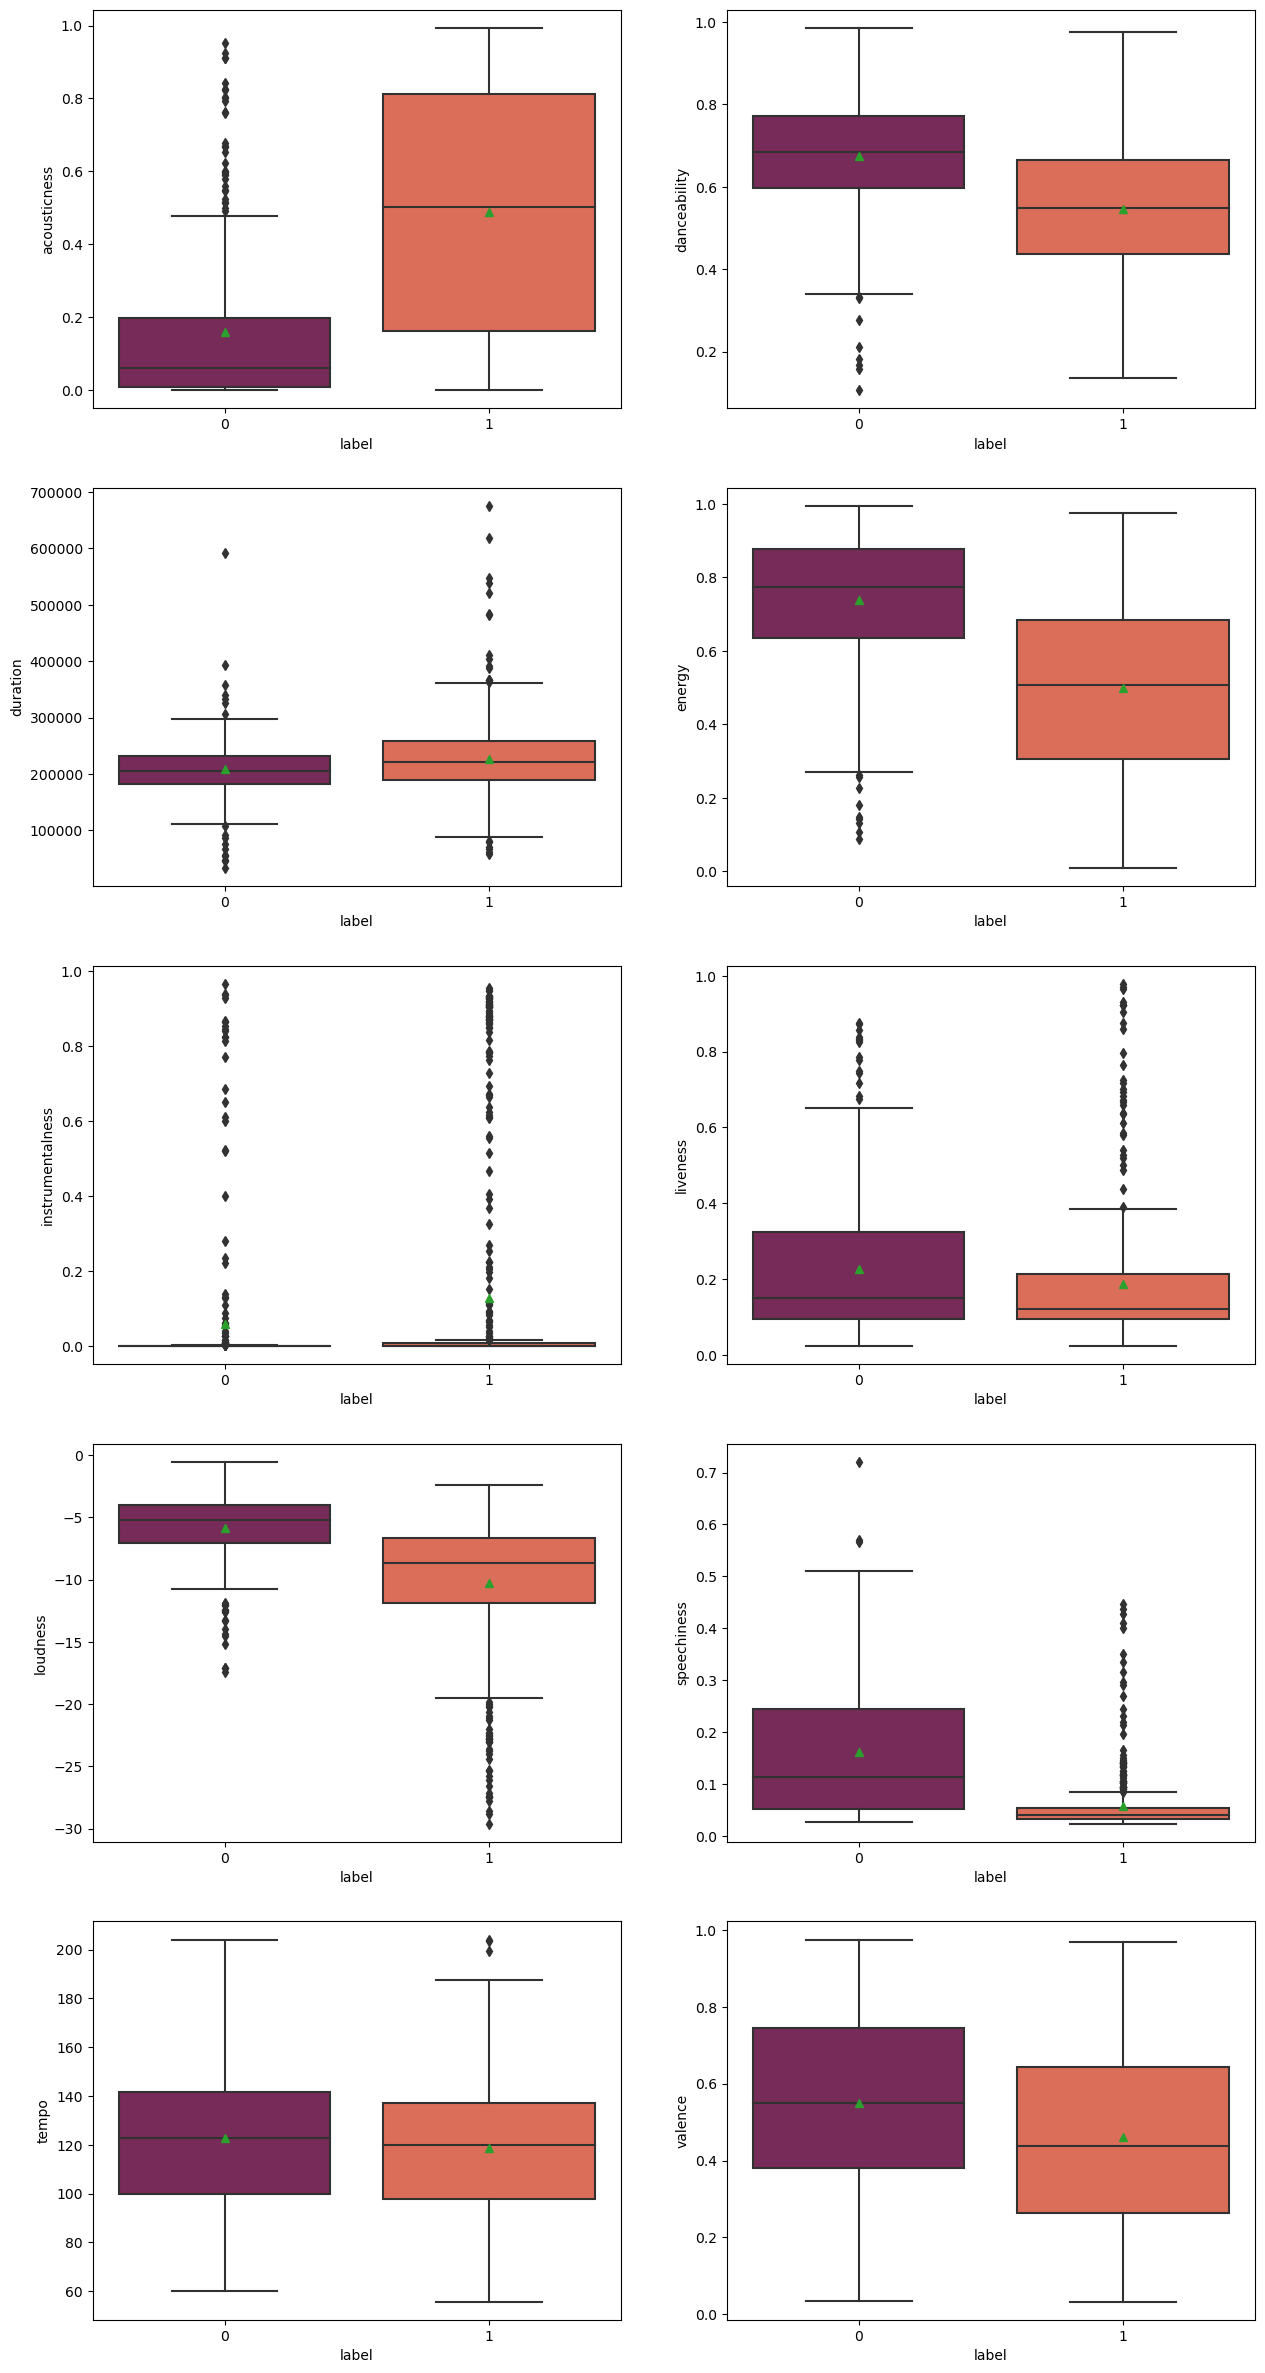

In [60]:
# creamos los diagramas de cajas y bigotes para las variables numericas
plt.figure(figsize=(15,30))
for i, c in enumerate(NUMERICAL_FEATURES, 1):
 plt.subplot(5,2,i) 
 sns.boxplot(x='label', y=c, orient='v',data=df, palette = "rocket", showmeans=True)
 

Se puede decir que dos ditribuciones son diferentes si ...

La distribución de las variables según el label dado por el usuario revela algunas preferencias marcadas :

* Según la distribución de la variable **acousticness**, el usuario tiene preferencia por pistas que con un valor mayor a 0.2. Sin embargo, hay algunas con esta característica que son outliers y no son de su gusto.
* El usuarió tiene preferencia por canciones con una **energía** por debajo de 0.6 al igual de una **loudness** por debajo de -6. Estas dos variables están altamente correlacionadas de forma lineal en la mayoría de las pistas, con una correlación de Pearson de 0.86. 
* Según la varibale **speechiness** el usuario no presenta un gusto predominante por las pistas habladas.  
* Hay variables que no parecen influir en el gusto por la pista, dado que tienen distribuciones parecidas y se pueden considerar igual, como lo son el **tempo**,**liveness**,**duration** y la **valencia**.
* El gráfico de **instrumentalness** no otroga información clara de la distribucón dada la gran cantidad de outliers. 


## Correlaciones de Pearson

<AxesSubplot:>

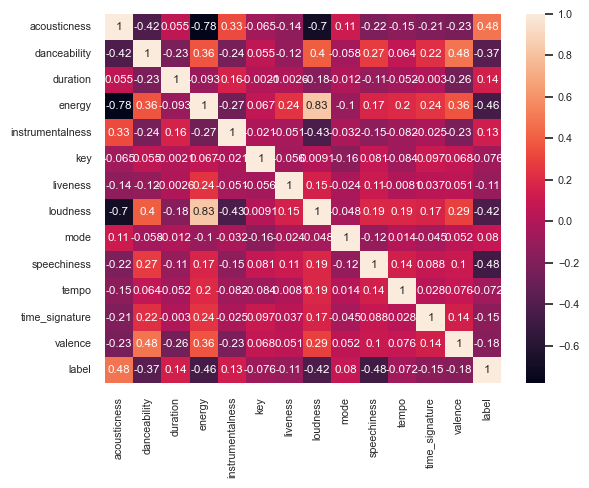

In [61]:
# Graficamos la matriz de correlación de Pearson
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True)


Existen varias correlaciones altas que nos hacen pensar que hay variables que se relacionan e interpretan de la misma manera, en el caso de las correlaciones positivas, o son opuestas en el caso de las correlaciones negativas. Son el caso de :
* **Energy** y **loudness** que presentan una correlación de 0.83  indicandonos que pueden describir la misma característica de la canción. Si se llega a probar dicho supuesto una de ellas se debe de eliminar del modelo que se creará pues otorgaría información redundante.
* **Energy** y **acousticness** tienen una correlación negativa de -0.78. De lo que podría inferirse que  las canciones que se consideran acusticas no tienen una clasificación alta en energí y vis ceversa. Esta misma situación se nota entre **energy** u **loudness** con un puntaje de -0.7, resultado de esperarse dada la anterior correlación. 

No se observan otras correlaciones significativas en el dataset.

## Conclusiones

Las siguientes columnas se podrian convertir en variables categoricas:

speechiness:
 - 0 : 0 menor a 0.33    => 
 - 1 : entre 0.33 y 0.66 => rap
 - 2 : mayor a 0.66      => audolibro

acousticness:
- 0 : 0 menor a 0.50 => No es acustico
- 1 : 1 mayor a 0.50 => Si es acustico

instrumentalness:
- 0: menor a 0.5 = vocal        => 0
- 1: mayor a 0.5 = instrumental => 1

liveness:
- 0 : menor a 0.8 = Estudio => 0
- 1 : mayor a 0.8 = En vivo => 1

valence:
- 0 : menor a 0.5 = triste => 0
- 1 : mayor a 0.5 = feliz => 1




Convertiremos las variables numericas en categóricas.

In [62]:
# Hago una copia del dataset
df_copia = df.copy() 

Columna 'speechiness'

In [63]:
# Reemplazo los valores de la columna 'speechiness' por 0, 1 o 2
df_copia['speechiness'] = df['speechiness'].apply(lambda x: 0 if x <= 0.33 else (1 if x <= 0.66 else 2))  # 0: musica, 1: rap, 2: AUdiolibro 


In [64]:
df_copia['speechiness'].value_counts()

0    707
1     42
2      1
Name: speechiness, dtype: int64

Columna 'acousticness'

In [65]:
# Reemplazo los valores de la columna 'acousticness' por 0 o 1 
df_copia['acousticness'] = df['acousticness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: No acustico, 1: Acustico


In [66]:
df_copia['acousticness'].value_counts()

0    495
1    255
Name: acousticness, dtype: int64

Columna 'instrumentalness'

In [67]:
# Reemplazo los valores de la columna 'instrumentalness' por 0 o 1
df_copia['instrumentalness'] = df['instrumentalness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Vocal, 1: Instrumental

In [68]:
df_copia['instrumentalness'].value_counts()

0    668
1     82
Name: instrumentalness, dtype: int64

Columna 'liveness'

In [69]:
# Reemplazo los valores de la columna 'liveness' por 0 o 1
df_copia['liveness'] = df['liveness'].apply(lambda x: 0 if x <= 0.8 else 1) # 0: Estudio, 1: En vivo

In [70]:
df_copia['liveness'].value_counts()

0    733
1     17
Name: liveness, dtype: int64

Columna 'valence'

In [71]:
# Reemplazo los valores de la columna 'valence' por 0 o 1
df_copia['valence'] = df['valence'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Triste, 1: Feliz

In [72]:
df_copia['valence'].value_counts()

0    385
1    365
Name: valence, dtype: int64

In [73]:
CATEGORICAL_FEATURES

['key', 'mode', 'time_signature']

In [74]:
NUMERICAL_FEATURES

['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

Redefinimos las variables numericas y categoricas:

speechiness
acousticness
instrumentalness
liveness
valence

In [75]:
# Redefinidas
NUMERICAL_FEATURES = ['danceability', 'duration', 'energy', 'loudness', 'tempo']
CATEGORICAL_FEATURES = ['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'mode', 'time_signature', 'valence']


In [76]:
# Mostramos un resumen estadístico de las columnas numéricas que quedaron
df_copia[NUMERICAL_FEATURES].describe() 

,danceability,duration,energy,loudness,tempo
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.596439,220112.733333,0.594188,-8.509339,120.405761
std,0.172036,65587.690483,0.253301,5.039488,28.378116
min,0.107000,33840.000000,0.009250,-29.601000,55.747000
25%,0.480000,185490.250000,0.423250,-10.173500,98.998000
50%,0.606000,215108.500000,0.631500,-7.270000,120.104500
75%,0.715750,244236.750000,0.804750,-5.097750,138.074750
max,0.986000,675360.000000,0.995000,-0.533000,204.162000


In [77]:
# Mostramos un resumen estadístico de las columnas categóricas incluidas las nuevas
df_copia[CATEGORICAL_FEATURES].describe() 

,acousticness,instrumentalness,liveness,speechiness,key,mode,time_signature,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.340000,0.109333,0.022667,0.058667,4.829333,0.741333,3.902667,0.486667
std,0.474025,0.312265,0.148938,0.240767,3.636001,0.438194,0.400091,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,11.000000,1.000000,5.000000,1.000000


Veo graficamente las variables categoricas nuevas

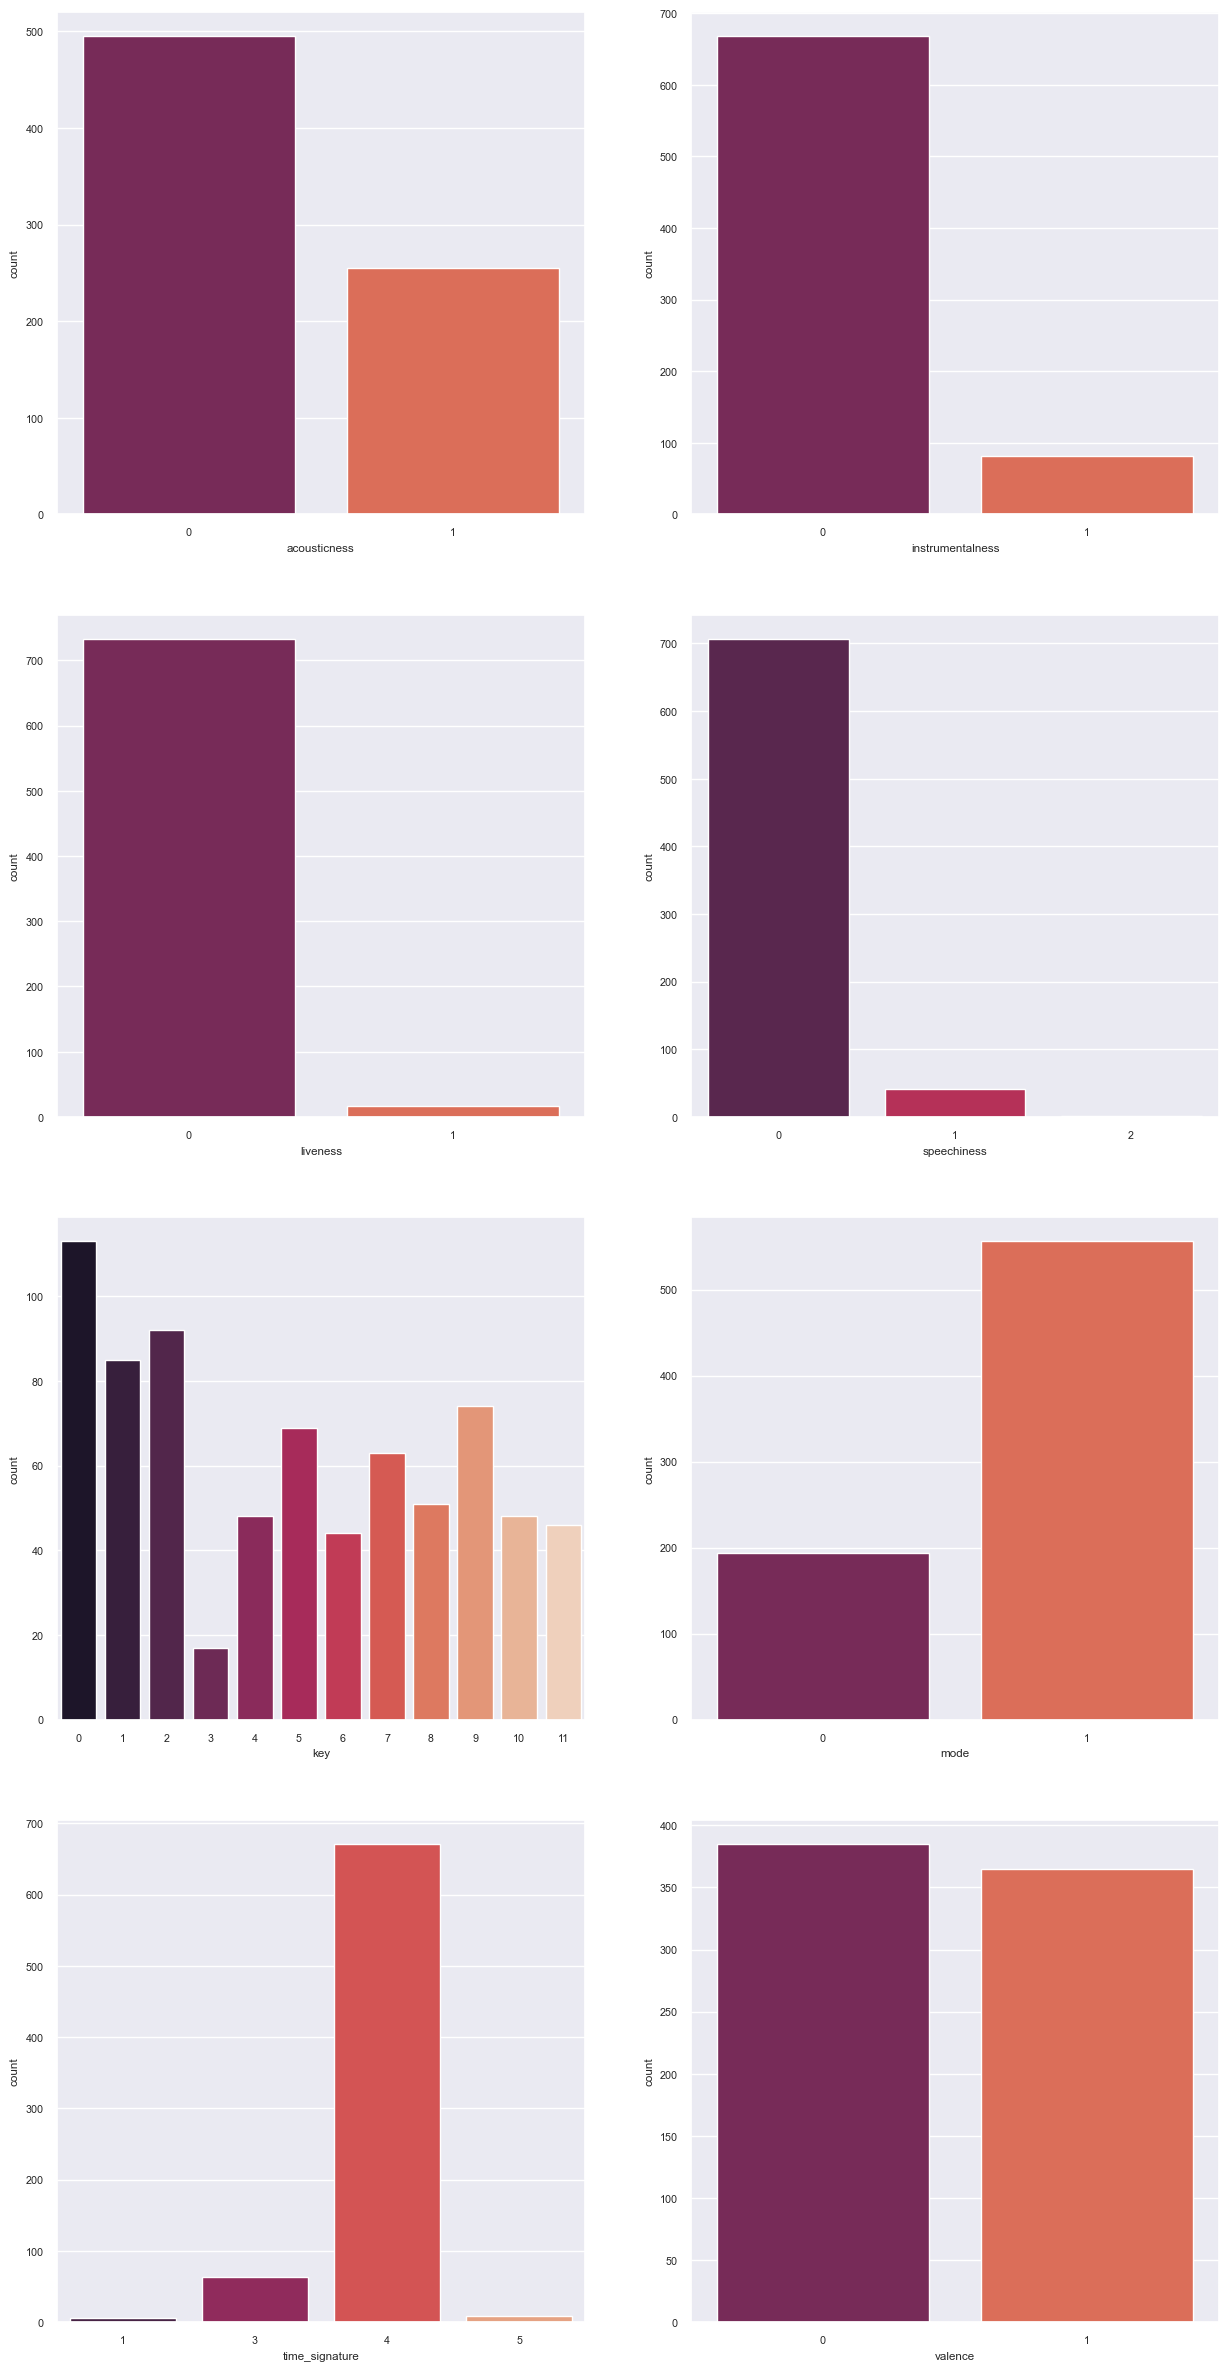

In [91]:
plt.figure(figsize=(15,30))
for i, c in enumerate(CATEGORICAL_FEATURES, 1):
 plt.subplot(4,2,i) 
 sns.countplot(x=c,data=df_copia, palette = "rocket")
 

Con esta nueva categorización se hace más notables los sesgos presentes en algunas de las variables categoricas que se habían encontrado con la medida de simetria y la curtosis. 

# Grafico de Q-QPlot

Grafico qqplot para la columna 'danceability'

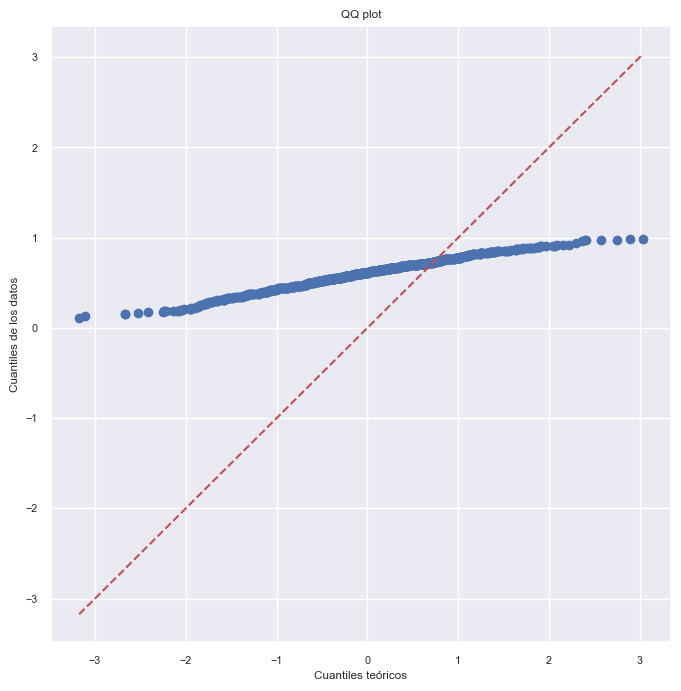

In [84]:
# Evaluo graficamente la normalidad de la variables numérica 'danceability'
danceability = df_copia['danceability']

# Generamos los cuantiles teóricos y de los datos
q_theor = stats.norm.rvs(size=len(danceability))  # cuantiles teóricos
q_theor.sort()

q_data = np.array(danceability)  # cuantiles de los datos
q_data.sort()

# Creamos el QQPlot
plt.figure(figsize=(8, 8))
plt.plot(q_theor, q_data, 'o')

# Agregamos la línea de referencia (45 grados en nuestro caso)
plt.plot([np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 
         [np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 'r--')

plt.title('QQ plot')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.show()


Grafico qqplot para la columna 'energy'

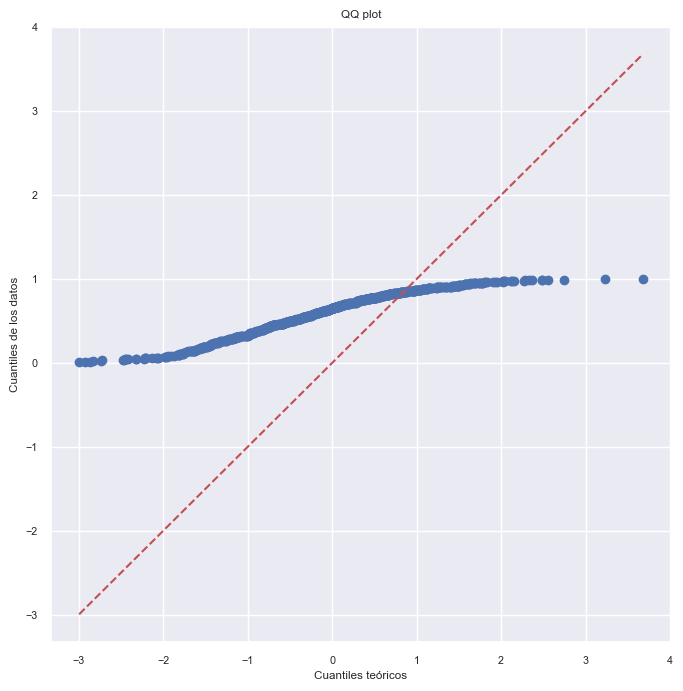

In [85]:
# Evaluo graficamente la normalidad de la variables numérica 'energy'
energy = df_copia['energy']

# Generamos los cuantiles teóricos y de los datos
q_theor = stats.norm.rvs(size=len(energy))  # cuantiles teóricos
q_theor.sort()

q_data = np.array(energy)  # cuantiles de los datos
q_data.sort()

# Creamos el QQPlot
plt.figure(figsize=(8, 8))
plt.plot(q_theor, q_data, 'o')

# Agregamos la línea de referencia (45 grados en nuestro caso)
plt.plot([np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 
         [np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 'r--')

plt.title('QQ plot')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.show()

Grafico qqplot para la columna 'loudness'

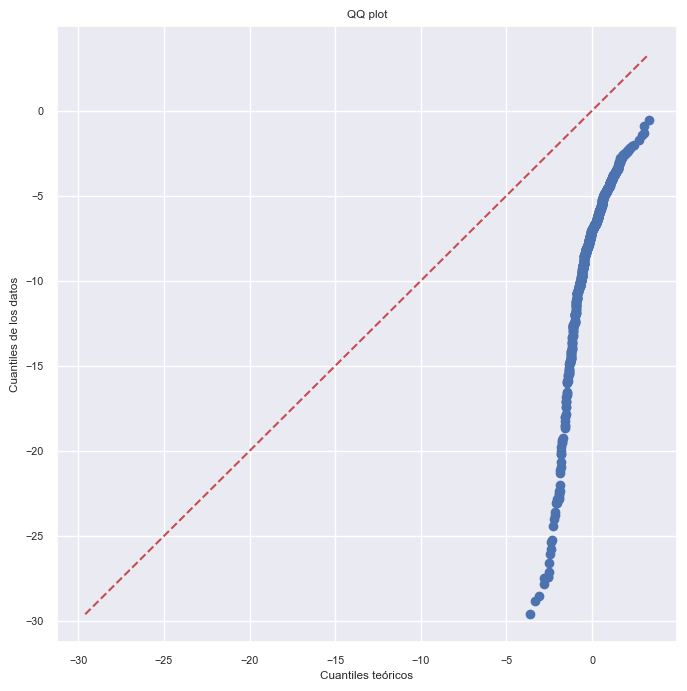

In [86]:
# Evaluo graficamente la normalidad de la variables numérica 'loudness'
loudness = df_copia['loudness']

# Generamos los cuantiles teóricos y de los datos
q_theor = stats.norm.rvs(size=len(loudness))  # cuantiles teóricos
q_theor.sort()

q_data = np.array(loudness)  # cuantiles de los datos
q_data.sort()

# Creamos el QQPlot
plt.figure(figsize=(8, 8))
plt.plot(q_theor, q_data, 'o')

# Agregamos la línea de referencia (45 grados en nuestro caso)
plt.plot([np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 
         [np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 'r--')

plt.title('QQ plot')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.show()

Grafico qqplot para la columna 'tempo'

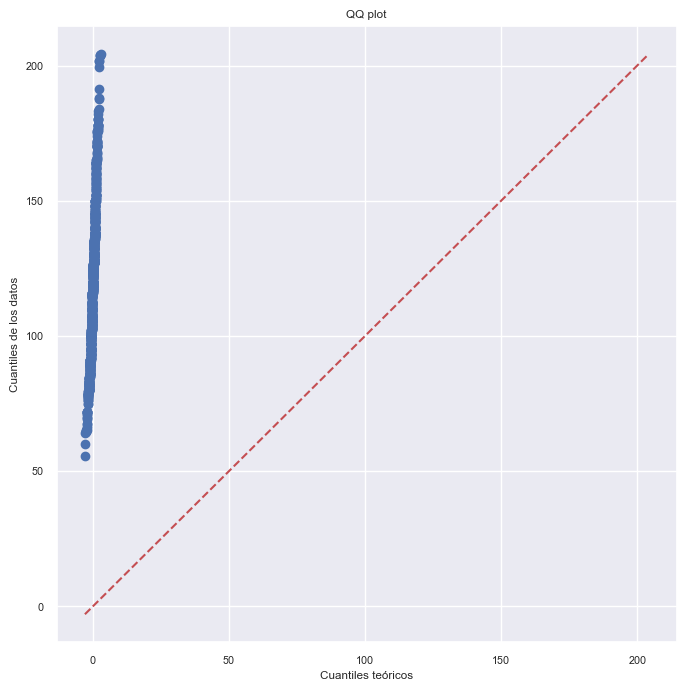

In [87]:
# Evaluo graficamente la normalidad de la variables numérica 'loudness'
tempo = df_copia['tempo']

# Generamos los cuantiles teóricos y de los datos
q_theor = stats.norm.rvs(size=len(tempo))  # cuantiles teóricos
q_theor.sort()

q_data = np.array(tempo)  # cuantiles de los datos
q_data.sort()

# Creamos el QQPlot
plt.figure(figsize=(8, 8))
plt.plot(q_theor, q_data, 'o')

# Agregamos la línea de referencia (45 grados en nuestro caso)
plt.plot([np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 
         [np.min((q_theor.min(),q_data.min())), np.max((q_theor.max(),q_data.max()))], 'r--')

plt.title('QQ plot')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.show()